<a href="https://colab.research.google.com/github/arsyandairza/PCVK_Ganjil_2023/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TUGAS PRAKTIKUM**

**No 1**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
pip install pytesseract

**No 2**

In [6]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

**No 3**

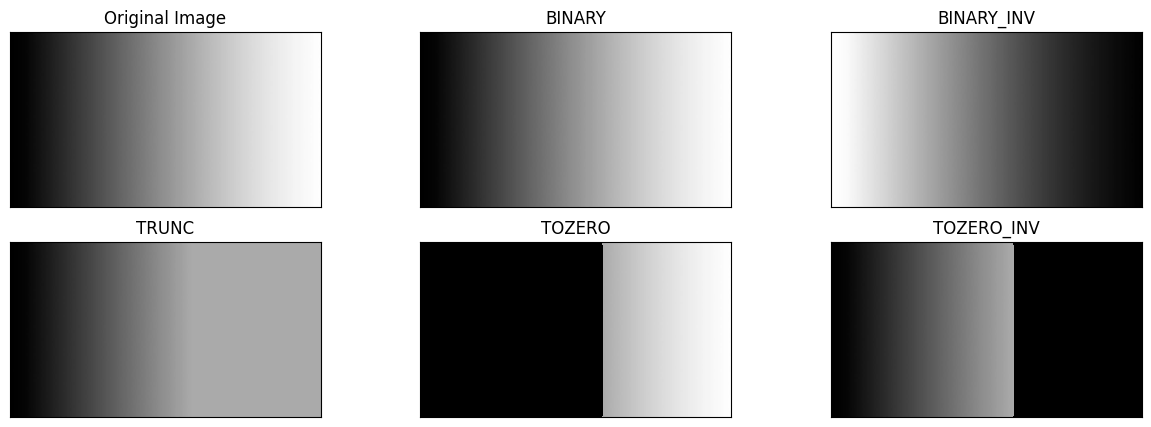

In [14]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam) thresh1[img>thresh] =255 #tanpa library thresh1[img<=thresh] = 0
#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1       #tanpa library
#3. Threshold Truncate
thresh3[img>thresh] = thresh         #tanpa library
#4. Threshold Tozero
thresh4[img<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0
#tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**No 4**

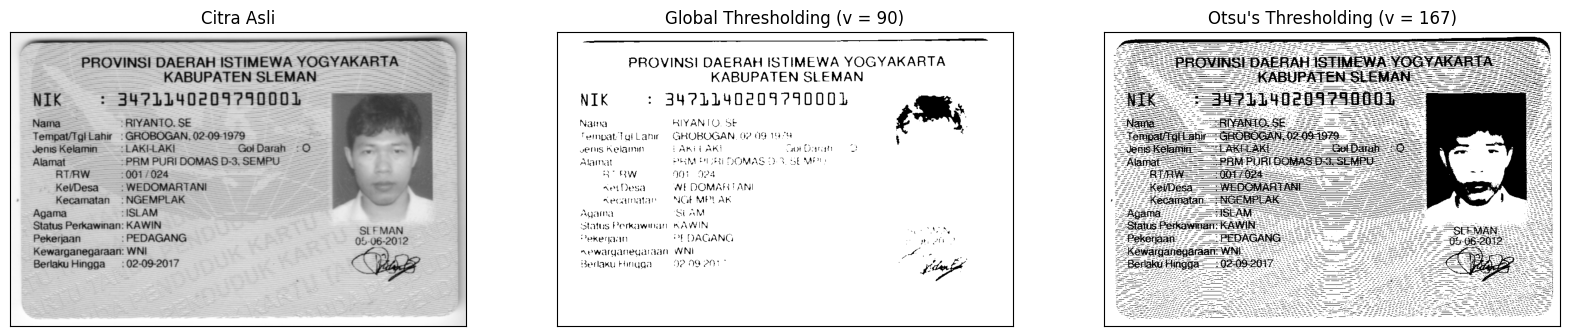

In [16]:
# Load gambar
filename = ('/content/drive/MyDrive/PCVK/ktp1.png')
img = cv.imread(filename, 0)

# Terapkan Gaussian blur pada gambar
blur = cv.GaussianBlur(img, (5, 5), 0)

# Tentukan fungsi untuk threshold Otsu
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    hist, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]:  # Rentang ini dari 1 hingga 254 (rentang uint8)
        pcb = np.sum(hist[:t])
        pcf = np.sum(hist[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t] * hist[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * hist[t:]) / float(pcf)
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

# Terapkan thresholding Otsu
otsu_binarized, otsu_thresh = otsu(img)

# Tentukan judul untuk gambar hasil thresholding Otsu
otsu_title = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"

# Terapkan thresholding global dengan nilai ambang tetap
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)

# Buat daftar gambar dan judulnya untuk ditampilkan
titles = ['Citra Asli', 'Global Thresholding (v = 90)', otsu_title]
images = [blur, th1, otsu_binarized]

# Tampilkan gambar
plt.figure(figsize=(20, 15))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

**No 5**

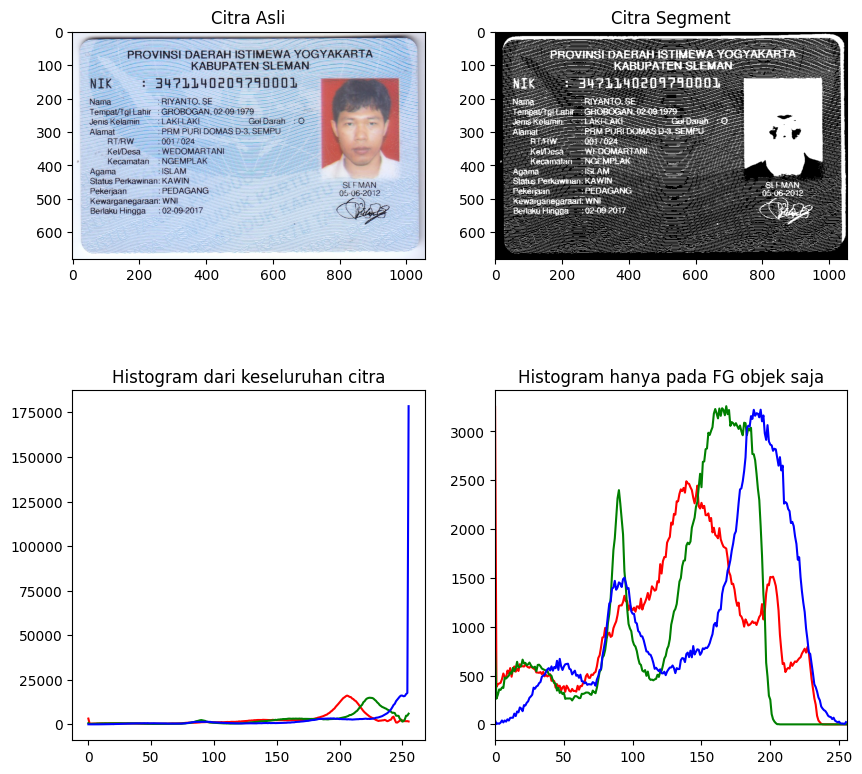

In [18]:
filename = ('/content/drive/MyDrive/PCVK/ktp1.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

**No 6**

(<Axes: >, <matplotlib.image.AxesImage at 0x79bbab8317b0>)

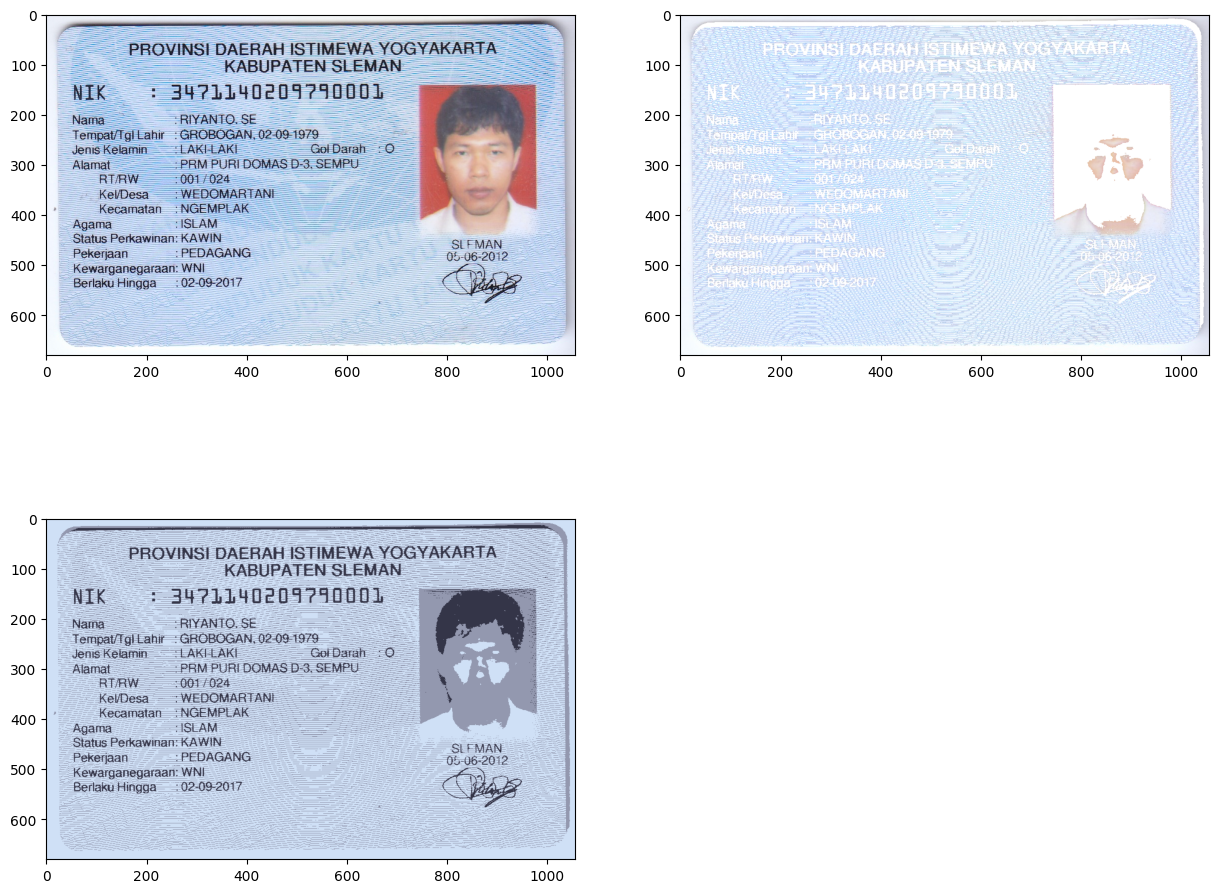

In [19]:
ilename = ('/content/drive/MyDrive/PCVK/ktp1.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama
(hijau, biru, dan putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k=3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

## **proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan**

**Install Pip OCR**

In [20]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 3s (1,954 kB/s)
debconf: unable to ini

**Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()**

In [21]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

**Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file**

In [ ]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/PCVK/ktp1.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

**Menambahkan kotak untuk deteksi teksi pada gambar**

In [22]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i],
text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,
255, 0), 2)
display(img)

NameError: ignored